In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

urls = ["https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats",
        "https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats",
        "https://fbref.com/en/squads/822bd0ba/Liverpool-Stats",
        "https://fbref.com/en/squads/19538871/Manchester-United-Stats"
        ]
df = pd.concat([pd.read_html(url, header=1)[0] for url in urls])


In [2]:
#remove NAN
df = df.dropna(axis=0, how='any')
df.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
20,Anthony Martial,fr FRA,FW,26-093,8,2,212.0,2.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.42,0.0,0.42,0.42,0.42,0.4,0.4,0.1,0.6,0.19,0.06,0.25,0.19,0.25,Matches
21,Daniel James,wls WAL,FW,24-118,2,2,126.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.2,0.2,0.0,0.3,0.17,0.01,0.19,0.17,0.19,Matches
22,Jesse Lingard,eng ENG,FW,29-083,13,1,210.0,2.3,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.86,0.0,0.86,0.86,0.86,0.3,0.3,0.2,0.5,0.15,0.08,0.23,0.15,0.23,Matches
23,Phil Jones,eng ENG,DF,30-015,1,1,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02,Matches
24,Donny van de Beek,nl NED,MF,24-324,8,0,75.0,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.20,0.0,1.20,1.20,1.20,0.7,0.7,0.5,1.2,0.88,0.58,1.46,0.88,1.46,Matches


In [3]:
shots_df = pd.concat([pd.read_html(url, header=1)[4] for url in urls])

In [4]:
pass_df = pd.concat([pd.read_html(url, header=1)[5] for url in urls])

In [5]:
sca_df = pd.concat([pd.read_html(url, header=1)[7] for url in urls])

In [6]:
defensive_df = pd.concat([pd.read_html(url, header=1)[8] for url in urls])

In [7]:
#merge the dataframes and remove the
df = pd.merge(df, shots_df, how='left', on=['Player'])
df = pd.merge(df, sca_df, how='left', on=['Player'])
df = pd.merge(df, pass_df, how='left', on=['Player'])
df = pd.merge(df, defensive_df, how='left', on=['Player'])

In [8]:
df.head()

,Player,Nation_x,Pos_x,Age_x,MP,Starts,Min,90s_x,Gls_x,Ast_x,G-PK,PK_x,PKatt_x,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG_x,npxG_x,xA_x,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches_x,Nation_y,Pos_y,Age_y,90s_y,Gls_y,Sh_x,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_y,PKatt_y,xG_y,npxG_y,npxG/Sh,G-xG,np:G-xG,Matches_y,Nation_x,Pos_x,Age_x,90s_x,SCA,SCA90,PassLive,PassDead,Drib,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches_x,Nation_y,Pos_y,Age_y,90s_y,Cmp,Att_x,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast_y,xA_y,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches_y,Nation,Pos,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_y,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,Antonio Rüdiger,de GER,DF,29-005,25,25,2250.0,25.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,0.08,0.08,0.08,1.8,1.8,1.1,2.9,0.07,0.04,0.12,0.07,0.12,Matches,de GER,DF,29-005,25.0,2,31,9,29.0,1.24,0.36,0.06,0.22,18.6,0,0,0,1.8,1.8,0.06,0.2,0.2,Matches,de GER,DF,29-005,25.0,30,1.20,25,0,1,2,2,0,7,0.28,4,0,0,1,2,0,Matches,de GER,DF,29-005,25.0,1545,1765,87.5,33198,10288,466,496,94.0,815,877,92.9,254,367,69.2,0,1.1,-1.1,11,156,22,4,120,Matches,de GER,DF,29-005,25.0,36,21,19,15,2,18,28,64.3,10,208,63,30.3,105,77,26,30,8,0,22,32,68,82,0,Matches
1,Edouard Mendy,sn SEN,GK,30-007,22,22,1980.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,sn SEN,GK,30-007,22.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,sn SEN,GK,30-007,22.0,1,0.05,1,0,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches,sn SEN,GK,30-007,22.0,502,622,80.7,12322,6876,136,137,99.3,228,233,97.9,127,240,52.9,0,0.0,0.0,0,1,0,0,0,Matches,sn SEN,GK,30-007,22.0,0,0,0,0,0,0,2,0.0,2,3,1,33.3,3,0,0,0,0,0,0,0,0,0,3,Matches
2,Thiago Silva,br BRA,DF,37-167,22,19,1823.0,20.3,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.15,0.15,0.15,0.7,0.7,0.1,0.8,0.03,0.01,0.04,0.03,0.04,Matches,br BRA,DF,37-167,20.3,3,13,5,38.5,0.64,0.25,0.23,0.60,10.1,0,0,0,0.7,0.7,0.05,2.3,2.3,Matches,br BRA,DF,37-167,20.3,17,0.84,12,0,0,3,1,1,1,0.05,0,0,0,0,1,0,Matches,br BRA,DF,37-167,20.3,1494,1618,92.3,32216,10965,432,447,96.6,795,829,95.9,256,319,80.3,0,0.1,-0.1,4,125,11,0,86,Matches,br BRA,DF,37-167,20.3,25,18,13,10,2,9,19,47.4,10,124,47,37.9,73,47,4,51,24,3,27,41,66,96,0,Matches
3,Jorginho,it ITA,MF,30-078,22,19,1688.0,18.8,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,0.37,0.00,0.05,5.0,0.4,2.1,2.5,0.26,0.11,0.38,0.02,0.13,Matches,it ITA,MF,30-078,18.8,6,8,2,25.0,0.43,0.11,0.00,0.00,28.8,0,6,6,5.0,0.4,0.05,1.0,-0.4,Matches,it ITA,MF,30-078,18.8,38,2.03,32,1,0,2,2,1,6,0.32,6,0,0,0,0,0,Matches,it ITA,MF,30-078,18.8,1160,1308,88.7,20497,4984,510,558,91.4,523,567,92.2,105,149,70.5,1,2.1,-1.1,16,98,25,0,92,Matches,it ITA,MF,30-078,18.8,50,32,23,23,4,14,59,23.7,45,359,118,32.9,131,175,53,31,6,0,25,45,95,16,1,Matches
4,Mason Mount,eng ENG,"MF,FW",23-057,22,17,1515.0,16.8,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,0.77,0.36,0.71,6.2,5.4,4.1,9.5,0.37,0.25,0.61,0.32,0.57,Matches,eng ENG,"MF,FW",23-057,16.8,7,42,19,45.2,2.50,1.13,0.14,0.32,17.4,4,1,1,6.2,5.4,0.13,0.8,0.6,Matches,eng ENG,"MF,FW",23-057,16.8,63,3.74,36,15,4,5,3,0,9,0.53,4,3,0,1,1,0,Matches,eng ENG,"MF,FW",23-057,16.8,594,769,77.2,9082,2739,334,379,88.1,182,224,81.3,47,103,45.6,6,4.1,1.9,34,35,32,7,67,Matches,eng ENG,"MF,FW",23-057,16.8,27,16,9,8,10,8,28,28.6,20,339,100,29.5,60,128,151,13,0,0,13,13,40,8,0,Matches


In [9]:
#rename columns
df.rename(columns={'Nation_x': 'Country', 'xG_x':'xG', 'Tkl':'Tackles', 'TklW':'Tackles Won', 'Past': 'Dribbled Past',
                    'Pos_x': 'Position', 'npxG_x':'npxG', 'xA_x':'xA', 'Press': 'Pressures', 'Succ': 'Successful Pressures',
                    'Age_x': 'Age', 'Sh_x': 'Shots', 'Int':'Interceptions', 'Clr':'Clearances', 'Err':'Errors',
                    'MP': 'Matches', 'SoT': 'On Target',
                    'Min': 'Minutes', 'SOT%': 'Shot Accuracy',
                    '90s_x': '90s',
                    'Ast.1':'Assists p90','Sh/90': 'Shots p90',
                    'Gls_x': 'Goals', 'SoT/90': 'On Target p90',
                    'Ast_x': 'Assists', 'G/Sh': 'Goals per Shot',
                    'G-PK': 'Non-Penalty Goals', 'Dist': 'Avg. Shot Distance',
                    'PK_x': 'Penalties Scored', 'FK': 'Shots from Free Kick',
                    'PKatt_x': 'Penalties Attempted', 
                    'CrdY': 'Yellow Cards', 
                    'CrdR': 'Red Cards', 'PassLive': 'Live Passes to Shot',
                    'Gls.1': 'Goals p90', 'PassDead': 'Dead Passes to Shot',
                    'Asts.1': 'Assists p90', 'Drib': 'Dribbles',
                    'G+A': 'Goals+Assists p90', 'Cmp': 'Passes Completed',
                    'G-PK.1': 'Non-Penalty Goals p90', 'Att_x': 'Passes Attempted', 'Cmp%': 'Passes Completed %',
                    'KP': 'Key Passes', '1/3':'Passes into Final Third', 'Prog':'Progressive Passes'}, inplace=True)

                    


In [10]:
df.head()

,Player,Country,Position,Age,Matches,Starts,Minutes,90s,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,Yellow Cards,Red Cards,Goals p90,Assists p90,Goals+Assists p90,Non-Penalty Goals p90,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches_x,Nation_y,Pos_y,Age_y,90s_y,Gls_y,Shots,On Target,SoT%,Shots p90,On Target p90,Goals per Shot,G/SoT,Avg. Shot Distance,Shots from Free Kick,PK_y,PKatt_y,xG_y,npxG_y,npxG/Sh,G-xG,np:G-xG,Matches_y,Country,Position,Age,90s,SCA,SCA90,Live Passes to Shot,Dead Passes to Shot,Dribbles,Sh_y,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches_x,Nation_y,Pos_y,Age_y,90s_y,Passes Completed,Passes Attempted,Passes Completed %,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast_y,xA_y,A-xA,Key Passes,Passes into Final Third,PPA,CrsPA,Progressive Passes,Matches_y,Nation,Pos,Age,90s,Tackles,Tackles Won,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att_y,Tkl%,Dribbled Past,Pressures,Successful Pressures,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Interceptions,Tkl+Int,Clearances,Errors,Matches
0,Antonio Rüdiger,de GER,DF,29-005,25,25,2250.0,25.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,0.08,0.08,0.08,1.8,1.8,1.1,2.9,0.07,0.04,0.12,0.07,0.12,Matches,de GER,DF,29-005,25.0,2,31,9,29.0,1.24,0.36,0.06,0.22,18.6,0,0,0,1.8,1.8,0.06,0.2,0.2,Matches,de GER,DF,29-005,25.0,30,1.20,25,0,1,2,2,0,7,0.28,4,0,0,1,2,0,Matches,de GER,DF,29-005,25.0,1545,1765,87.5,33198,10288,466,496,94.0,815,877,92.9,254,367,69.2,0,1.1,-1.1,11,156,22,4,120,Matches,de GER,DF,29-005,25.0,36,21,19,15,2,18,28,64.3,10,208,63,30.3,105,77,26,30,8,0,22,32,68,82,0,Matches
1,Edouard Mendy,sn SEN,GK,30-007,22,22,1980.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,sn SEN,GK,30-007,22.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,sn SEN,GK,30-007,22.0,1,0.05,1,0,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches,sn SEN,GK,30-007,22.0,502,622,80.7,12322,6876,136,137,99.3,228,233,97.9,127,240,52.9,0,0.0,0.0,0,1,0,0,0,Matches,sn SEN,GK,30-007,22.0,0,0,0,0,0,0,2,0.0,2,3,1,33.3,3,0,0,0,0,0,0,0,0,0,3,Matches
2,Thiago Silva,br BRA,DF,37-167,22,19,1823.0,20.3,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.15,0.15,0.15,0.7,0.7,0.1,0.8,0.03,0.01,0.04,0.03,0.04,Matches,br BRA,DF,37-167,20.3,3,13,5,38.5,0.64,0.25,0.23,0.60,10.1,0,0,0,0.7,0.7,0.05,2.3,2.3,Matches,br BRA,DF,37-167,20.3,17,0.84,12,0,0,3,1,1,1,0.05,0,0,0,0,1,0,Matches,br BRA,DF,37-167,20.3,1494,1618,92.3,32216,10965,432,447,96.6,795,829,95.9,256,319,80.3,0,0.1,-0.1,4,125,11,0,86,Matches,br BRA,DF,37-167,20.3,25,18,13,10,2,9,19,47.4,10,124,47,37.9,73,47,4,51,24,3,27,41,66,96,0,Matches
3,Jorginho,it ITA,MF,30-078,22,19,1688.0,18.8,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,0.37,0.00,0.05,5.0,0.4,2.1,2.5,0.26,0.11,0.38,0.02,0.13,Matches,it ITA,MF,30-078,18.8,6,8,2,25.0,0.43,0.11,0.00,0.00,28.8,0,6,6,5.0,0.4,0.05,1.0,-0.4,Matches,it ITA,MF,30-078,18.8,38,2.03,32,1,0,2,2,1,6,0.32,6,0,0,0,0,0,Matches,it ITA,MF,30-078,18.8,1160,1308,88.7,20497,4984,510,558,91.4,523,567,92.2,105,149,70.5,1,2.1,-1.1,16,98,25,0,92,Matches,it ITA,MF,30-078,18.8,50,32,23,23,4,14,59,23.7,45,359,118,32.9,131,175,53,31,6,0,25,45,95,16,1,Matches
4,Mason Mount,eng ENG,"MF,FW",23-057,22,17,1515.0,16.8,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,0.77,0.36,0.71,6.2,5.4,4.1,9.5,0.37,0.25,0.61,0.32,0.57,Matches,eng ENG,"MF,FW",23-057,16.8,7,42,19,45.2,2.50,1.13,0.14,0.32,17.4,4,1,1,6.2,5.4,0.13,0.8,0.6,Matches,eng ENG,"MF,FW",23-057,16.8,63,3.74,36,15,4,5,3,0,9,0.53,4,3,0,1,1,0,Matches,eng ENG,"MF,FW",23-057,16.8,594,769,77.2,9082,2739,334,379,88.1,182,224,81.3,47,103,45.6,6,4.1,1.9,34,35,32,7,67,Matches,eng ENG,"MF,FW",23-057,16.8,27,16,9,8,10,8,28,28.6,20,339,100,29.5,60,128,151,13,0,0,13,13,40,8,0,Matches


In [11]:
#drop columns 
df.drop(['xG.1','xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Matches_x', 'Nation_y', 'Pos_y', 'Age_y', '90s_y', 'Gls_y', 'G/SoT', 'PK_y', 'PKatt_y',
'xG_y', 'npxG_y', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches_y', 'Sh_y', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'Drib.1',
'Sh.1', 'Fld.1', 'Def.1', 'Matches_x', 'Nation_y', 'Pos_y', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3',
'Att.3', 'Cmp%.3', 'Ast_y', 'xA_y', 'A-xA', 'PPA', 'CrsPA', 'Matches_y', 'Tkl.1', 'Att_y', 'Tkl%', 'Def 3rd.1', 'Mid 3rd.1',
'Att 3rd.1', 'Sh', 'ShSv', 'Matches', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Pos', 'Nation','90s'], axis=1, inplace=True)

In [12]:
df.head()

,Player,Country,Position,Age,Starts,Minutes,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,Yellow Cards,Red Cards,Goals p90,Assists p90,Goals+Assists p90,Non-Penalty Goals p90,G+A-PK,xG,npxG,xA,npxG+xA,Shots,On Target,SoT%,Shots p90,On Target p90,Goals per Shot,Avg. Shot Distance,Shots from Free Kick,Country,Position,Age,SCA,SCA90,Live Passes to Shot,Dead Passes to Shot,Dribbles,Passes Completed,Passes Attempted,Passes Completed %,Key Passes,Passes into Final Third,Progressive Passes,Age,Tackles,Tackles Won,Dribbled Past,Pressures,Successful Pressures,%,Blocks,Pass,Interceptions,Tkl+Int,Clearances,Errors
0,Antonio Rüdiger,de GER,DF,29-005,25,2250.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,0.08,0.08,0.08,1.8,1.8,1.1,2.9,31,9,29.0,1.24,0.36,0.06,18.6,0,de GER,DF,29-005,30,1.20,25,0,1,1545,1765,87.5,11,156,120,29-005,36,21,10,208,63,30.3,30,22,32,68,82,0
1,Edouard Mendy,sn SEN,GK,30-007,22,1980.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,NaN,0.00,0.00,NaN,NaN,0,sn SEN,GK,30-007,1,0.05,1,0,0,502,622,80.7,0,1,0,30-007,0,0,2,3,1,33.3,0,0,0,0,0,3
2,Thiago Silva,br BRA,DF,37-167,19,1823.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.15,0.15,0.15,0.7,0.7,0.1,0.8,13,5,38.5,0.64,0.25,0.23,10.1,0,br BRA,DF,37-167,17,0.84,12,0,0,1494,1618,92.3,4,125,86,37-167,25,18,10,124,47,37.9,51,27,41,66,96,0
3,Jorginho,it ITA,MF,30-078,19,1688.0,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,0.37,0.00,0.05,5.0,0.4,2.1,2.5,8,2,25.0,0.43,0.11,0.00,28.8,0,it ITA,MF,30-078,38,2.03,32,1,0,1160,1308,88.7,16,98,92,30-078,50,32,45,359,118,32.9,31,25,45,95,16,1
4,Mason Mount,eng ENG,"MF,FW",23-057,17,1515.0,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,0.77,0.36,0.71,6.2,5.4,4.1,9.5,42,19,45.2,2.50,1.13,0.14,17.4,4,eng ENG,"MF,FW",23-057,63,3.74,36,15,4,594,769,77.2,34,35,67,23-057,27,16,20,339,100,29.5,13,13,13,40,8,0


In [13]:
df['90s'] = (round(df['Minutes']/90,2))

In [14]:
df.head()

,Player,Country,Position,Age,Starts,Minutes,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,Yellow Cards,Red Cards,Goals p90,Assists p90,Goals+Assists p90,Non-Penalty Goals p90,G+A-PK,xG,npxG,xA,npxG+xA,Shots,On Target,SoT%,Shots p90,On Target p90,Goals per Shot,Avg. Shot Distance,Shots from Free Kick,Country,Position,Age,SCA,SCA90,Live Passes to Shot,Dead Passes to Shot,Dribbles,Passes Completed,Passes Attempted,Passes Completed %,Key Passes,Passes into Final Third,Progressive Passes,Age,Tackles,Tackles Won,Dribbled Past,Pressures,Successful Pressures,%,Blocks,Pass,Interceptions,Tkl+Int,Clearances,Errors,90s
0,Antonio Rüdiger,de GER,DF,29-005,25,2250.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,0.08,0.08,0.08,1.8,1.8,1.1,2.9,31,9,29.0,1.24,0.36,0.06,18.6,0,de GER,DF,29-005,30,1.20,25,0,1,1545,1765,87.5,11,156,120,29-005,36,21,10,208,63,30.3,30,22,32,68,82,0,25.00
1,Edouard Mendy,sn SEN,GK,30-007,22,1980.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,NaN,0.00,0.00,NaN,NaN,0,sn SEN,GK,30-007,1,0.05,1,0,0,502,622,80.7,0,1,0,30-007,0,0,2,3,1,33.3,0,0,0,0,0,3,22.00
2,Thiago Silva,br BRA,DF,37-167,19,1823.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.15,0.15,0.15,0.7,0.7,0.1,0.8,13,5,38.5,0.64,0.25,0.23,10.1,0,br BRA,DF,37-167,17,0.84,12,0,0,1494,1618,92.3,4,125,86,37-167,25,18,10,124,47,37.9,51,27,41,66,96,0,20.26
3,Jorginho,it ITA,MF,30-078,19,1688.0,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,0.37,0.00,0.05,5.0,0.4,2.1,2.5,8,2,25.0,0.43,0.11,0.00,28.8,0,it ITA,MF,30-078,38,2.03,32,1,0,1160,1308,88.7,16,98,92,30-078,50,32,45,359,118,32.9,31,25,45,95,16,1,18.76
4,Mason Mount,eng ENG,"MF,FW",23-057,17,1515.0,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,0.77,0.36,0.71,6.2,5.4,4.1,9.5,42,19,45.2,2.50,1.13,0.14,17.4,4,eng ENG,"MF,FW",23-057,63,3.74,36,15,4,594,769,77.2,34,35,67,23-057,27,16,20,339,100,29.5,13,13,13,40,8,0,16.83


In [15]:
#reorder columns
df_fb_ref = df[['Player', 'Country', 'Position', 'Age', '90s', 'Starts','Minutes', 'Goals', 'Assists', 'Non-Penalty Goals', 'Penalties Scored', 'Penalties Attempted', 'Yellow Cards', 'Red Cards', 'Goals p90', 'Assists p90', 'xG', 'npxG', 'xA', 'Shots', 'On Target', 'SoT%', 'Shots p90', 'On Target p90', 'Goals per Shot', 'Avg. Shot Distance', 'Shots from Free Kick', 'SCA', 'SCA90', 'Dribbles', 'Passes Attempted', 'Passes Completed', 'Passes Completed %', 'Key Passes', 'Passes into Final Third', 'Progressive Passes', 'Tackles', 'Tackles Won', 'Pressures', 'Successful Pressures', 'Blocks', 'Interceptions', 'Clearances', 'Dribbled Past', 'Errors']].copy()


In [16]:
df_fb_ref.head()

,Player,Country,Country,Position,Position,Age,Age,Age,90s,Starts,Minutes,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,Yellow Cards,Red Cards,Goals p90,Assists p90,xG,npxG,xA,Shots,On Target,SoT%,Shots p90,On Target p90,Goals per Shot,Avg. Shot Distance,Shots from Free Kick,SCA,SCA90,Dribbles,Passes Attempted,Passes Completed,Passes Completed %,Key Passes,Passes into Final Third,Progressive Passes,Tackles,Tackles Won,Pressures,Successful Pressures,Blocks,Interceptions,Clearances,Dribbled Past,Errors
0,Antonio Rüdiger,de GER,de GER,DF,DF,29-005,29-005,29-005,25.00,25,2250.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,1.8,1.8,1.1,31,9,29.0,1.24,0.36,0.06,18.6,0,30,1.20,1,1765,1545,87.5,11,156,120,36,21,208,63,30,32,82,10,0
1,Edouard Mendy,sn SEN,sn SEN,GK,GK,30-007,30-007,30-007,22.00,22,1980.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,NaN,0.00,0.00,NaN,NaN,0,1,0.05,0,622,502,80.7,0,1,0,0,0,3,1,0,0,0,2,3
2,Thiago Silva,br BRA,br BRA,DF,DF,37-167,37-167,37-167,20.26,19,1823.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.7,0.7,0.1,13,5,38.5,0.64,0.25,0.23,10.1,0,17,0.84,0,1618,1494,92.3,4,125,86,25,18,124,47,51,41,96,10,0
3,Jorginho,it ITA,it ITA,MF,MF,30-078,30-078,30-078,18.76,19,1688.0,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,5.0,0.4,2.1,8,2,25.0,0.43,0.11,0.00,28.8,0,38,2.03,0,1308,1160,88.7,16,98,92,50,32,359,118,31,45,16,45,1
4,Mason Mount,eng ENG,eng ENG,"MF,FW","MF,FW",23-057,23-057,23-057,16.83,17,1515.0,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,6.2,5.4,4.1,42,19,45.2,2.50,1.13,0.14,17.4,4,63,3.74,4,769,594,77.2,34,35,67,27,16,339,100,13,13,8,20,0


In [17]:
#remove duplicate columns
df_fb_ref = df_fb_ref.loc[:,~df_fb_ref.columns.duplicated()]

In [18]:
df_fb_ref.head()

,Player,Country,Position,Age,90s,Starts,Minutes,Goals,Assists,Non-Penalty Goals,Penalties Scored,Penalties Attempted,Yellow Cards,Red Cards,Goals p90,Assists p90,xG,npxG,xA,Shots,On Target,SoT%,Shots p90,On Target p90,Goals per Shot,Avg. Shot Distance,Shots from Free Kick,SCA,SCA90,Dribbles,Passes Attempted,Passes Completed,Passes Completed %,Key Passes,Passes into Final Third,Progressive Passes,Tackles,Tackles Won,Pressures,Successful Pressures,Blocks,Interceptions,Clearances,Dribbled Past,Errors
0,Antonio Rüdiger,de GER,DF,29-005,25.00,25,2250.0,2.0,0.0,2.0,0.0,0.0,5.0,0.0,0.08,0.00,1.8,1.8,1.1,31,9,29.0,1.24,0.36,0.06,18.6,0,30,1.20,1,1765,1545,87.5,11,156,120,36,21,208,63,30,32,82,10,0
1,Edouard Mendy,sn SEN,GK,30-007,22.00,22,1980.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,NaN,0.00,0.00,NaN,NaN,0,1,0.05,0,622,502,80.7,0,1,0,0,0,3,1,0,0,0,2,3
2,Thiago Silva,br BRA,DF,37-167,20.26,19,1823.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,0.15,0.00,0.7,0.7,0.1,13,5,38.5,0.64,0.25,0.23,10.1,0,17,0.84,0,1618,1494,92.3,4,125,86,25,18,124,47,51,41,96,10,0
3,Jorginho,it ITA,MF,30-078,18.76,19,1688.0,6.0,1.0,0.0,6.0,6.0,4.0,0.0,0.32,0.05,5.0,0.4,2.1,8,2,25.0,0.43,0.11,0.00,28.8,0,38,2.03,0,1308,1160,88.7,16,98,92,50,32,359,118,31,45,16,45,1
4,Mason Mount,eng ENG,"MF,FW",23-057,16.83,17,1515.0,7.0,6.0,6.0,1.0,1.0,2.0,0.0,0.42,0.36,6.2,5.4,4.1,42,19,45.2,2.50,1.13,0.14,17.4,4,63,3.74,4,769,594,77.2,34,35,67,27,16,339,100,13,13,8,20,0


In [19]:
#split Country column with ' ' and inplace=True
df_fb_ref['Country'] = df_fb_ref['Country'].str.split(' ', 1).str[1]



In [20]:
df_fb_ref.to_excel('fb_ref_data.xlsx', index=False)

In [95]:
df_fb_ref = df_fb_ref[df_fb_ref['Minutes'] > 100]
df_fb_ref = df_fb_ref[df_fb_ref['Position']!="GK"]


In [96]:
#create percentile rank columns for forwards
df_fb_ref['Goals_Percentile_Rank'] = df_fb_ref['Goals'].rank(pct=True)
df_fb_ref['Assists_Percentile_Rank'] = df_fb_ref['Assists'].rank(pct=True)
df_fb_ref['xG_Percentile_Rank'] = df_fb_ref['xG'].rank(pct=True)
df_fb_ref['Shots_Percentile_Rank'] = df_fb_ref['Shots'].rank(pct=True)
df_fb_ref['On Target_Percentile_Rank'] = df_fb_ref['On Target'].rank(pct=True)
df_fb_ref['SCA_Percentile_Rank'] = df_fb_ref['SCA'].rank(pct=True)
df_fb_ref['Dribble_Percentile_Rank'] = df_fb_ref['Dribbles'].rank(pct=True)
df_fb_ref['Key_pass_Percentile_Rank'] = df_fb_ref['Key Passes'].rank(pct=True)
df_fb_ref['npxG_Percentile_Rank'] = df_fb_ref['npxG'].rank(pct=True)

In [97]:
#create percentile rank columns for midfielders
df_fb_ref['Goals_Percentile_Rank_Mid'] = df_fb_ref['Goals'].rank(pct=True)
df_fb_ref['Assists_Percentile_Rank_Mid'] = df_fb_ref['Assists'].rank(pct=True)
df_fb_ref['xG_Percentile_Rank_Mid'] = df_fb_ref['xG'].rank(pct=True)
df_fb_ref['xA_Percentile_Rank_Mid'] = df_fb_ref['xA'].rank(pct=True)
df_fb_ref['Shots_Percentile_Rank_Mid'] = df_fb_ref['Shots'].rank(pct=True)
df_fb_ref['On Target_Percentile_Rank_Mid'] = df_fb_ref['On Target'].rank(pct=True)
df_fb_ref['SCA_Percentile_Rank_Mid'] = df_fb_ref['SCA'].rank(pct=True)
df_fb_ref['Dribble_Percentile_Rank_Mid'] = df_fb_ref['Dribbles'].rank(pct=True)
df_fb_ref['Pass_Percentile_Rank_Mid'] = df_fb_ref['Passes Attempted'].rank(pct=True)
df_fb_ref['Key Passes_Percentile_Rank_Mid'] = df_fb_ref['Key Passes'].rank(pct=True)
df_fb_ref['Progressive Passes_Percentile_Rank_Mid'] = df_fb_ref['Progressive Passes'].rank(pct=True)
df_fb_ref['Pressures_Percentile_Rank_Mid'] = df_fb_ref['Pressures'].rank(pct=True)



In [98]:
#create percentile rank columns for defenders
df_fb_ref['Goals_Percentile_Rank_Def'] = df_fb_ref['Goals'].rank(pct=True)
df_fb_ref['Assists_Percentile_Rank_Def'] = df_fb_ref['Assists'].rank(pct=True)
df_fb_ref['Tackles_Percentile_Rank_Def'] = df_fb_ref['Tackles'].rank(pct=True)
df_fb_ref['Pressures_Percentile_Rank_Def'] = df_fb_ref['Pressures'].rank(pct=True)
df_fb_ref['Interceptions_Percentile_Rank_Def'] = df_fb_ref['Interceptions'].rank(pct=True)
df_fb_ref['Clearances_Percentile_Rank_Def'] = df_fb_ref['Clearances'].rank(pct=True)
df_fb_ref['Dribbled Past_Percentile_Rank_Def'] = df_fb_ref['Dribbled Past'].rank(pct=True)
df_fb_ref['Errors_Percentile_Rank_Def'] = df_fb_ref['Errors'].rank(pct=True)


In [99]:
#Player position if Forward if Position = 'FW', Midfielder if Position = 'MF'   , Defender if Position = 'DF'
df_fb_ref['Position'] = df_fb_ref['Position'].replace(['FW', 'MF', 'DF', 'MF,FW'], ['Forward', 'Midfielder', 'Defender', 'Midfielder'])




In [115]:
#input player name and position from a list
player_name = input("Enter player name: ")
player_position = input("Enter player position: ")

#if player name is not in the dataframe, print error message
if player_name not in df_fb_ref['Player'].values:
    print('Player not found')

In [116]:
#Get values of the player_name for different columns for forwards multiply by 100
Goals_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['Goals_Percentile_Rank'].values[0]
Assists_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['Assists_Percentile_Rank'].values[0]
xG_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['xG_Percentile_Rank'].values[0]
npxG_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['npxG_Percentile_Rank'].values[0]
Key_Passes_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['Key_pass_Percentile_Rank'].values[0]
Shots_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['Shots_Percentile_Rank'].values[0]
On_Target_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['On Target_Percentile_Rank'].values[0]
SCA_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['SCA_Percentile_Rank'].values[0]
Dribble_Percentile_Rank = df_fb_ref[df_fb_ref['Player'] == player_name]['Dribble_Percentile_Rank'].values[0]


In [117]:
#Get values of the player_name for different columns for midfielders multiply by 100
Goals_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Goals_Percentile_Rank_Mid'].values[0]
Assists_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Assists_Percentile_Rank_Mid'].values[0]
xG_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['xG_Percentile_Rank_Mid'].values[0]
xA_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['xA_Percentile_Rank_Mid'].values[0]
Shots_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Shots_Percentile_Rank_Mid'].values[0]
On_Target_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['On Target_Percentile_Rank_Mid'].values[0]
SCA_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['SCA_Percentile_Rank_Mid'].values[0]
Dribble_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Dribble_Percentile_Rank_Mid'].values[0]
Pass_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Pass_Percentile_Rank_Mid'].values[0]
Key_Passes_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Key Passes_Percentile_Rank_Mid'].values[0]
Progressive_Passes_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Progressive Passes_Percentile_Rank_Mid'].values[0]
Pressures_Percentile_Rank_Mid = df_fb_ref[df_fb_ref['Player'] == player_name]['Pressures_Percentile_Rank_Mid'].values[0]


In [118]:
#get values of the player_name for different columns for defenders multiply by 100
Goals_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Goals_Percentile_Rank_Def'].values[0]
Assists_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Assists_Percentile_Rank_Def'].values[0]
Tackles_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Tackles_Percentile_Rank_Def'].values[0]
Pressures_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Pressures_Percentile_Rank_Def'].values[0]
Interceptions_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Interceptions_Percentile_Rank_Def'].values[0]
Clearances_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Clearances_Percentile_Rank_Def'].values[0]
Dribbled_Past_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Dribbled Past_Percentile_Rank_Def'].values[0]
Errors_Percentile_Rank_Def = df_fb_ref[df_fb_ref['Player'] == player_name]['Errors_Percentile_Rank_Def'].values[0]

In [119]:
#percentile_rank list for forwards
percentile_rank_list_forwards = [Goals_Percentile_Rank, Assists_Percentile_Rank, xG_Percentile_Rank, npxG_Percentile_Rank, Key_Passes_Percentile_Rank, Shots_Percentile_Rank, On_Target_Percentile_Rank, SCA_Percentile_Rank, Dribble_Percentile_Rank]


In [120]:
#percentile_rank list for midfielders
percentile_rank_list_midfielders = [Goals_Percentile_Rank_Mid, Assists_Percentile_Rank_Mid, xG_Percentile_Rank_Mid, xA_Percentile_Rank_Mid, Shots_Percentile_Rank_Mid, On_Target_Percentile_Rank_Mid, SCA_Percentile_Rank_Mid, Dribble_Percentile_Rank_Mid, Pass_Percentile_Rank_Mid, Key_Passes_Percentile_Rank_Mid, Progressive_Passes_Percentile_Rank_Mid, Pressures_Percentile_Rank_Mid]

In [121]:
#percentile_rank list for defenders
percentile_rank_list_defenders = [Goals_Percentile_Rank_Def, Assists_Percentile_Rank_Def, Tackles_Percentile_Rank_Def, Pressures_Percentile_Rank_Def, Interceptions_Percentile_Rank_Def, Clearances_Percentile_Rank_Def, Dribbled_Past_Percentile_Rank_Def, Errors_Percentile_Rank_Def]

In [122]:
import numpy as np
#percentile_rank list for all players
percentile_rank_list = [percentile_rank_list_forwards, percentile_rank_list_midfielders, percentile_rank_list_defenders]

#Multiply the percentile_rank list by 100 and round to 2 decimal places for forwards, midfielders and defenders
percentile_rank_list_forwards_100 = [round(x*100, 2) for x in percentile_rank_list_forwards]
percentile_rank_list_midfielders_100 = [round(x*100, 2) for x in percentile_rank_list_midfielders]
percentile_rank_list_defenders_100 = [round(x*100, 2) for x in percentile_rank_list_defenders]

In [123]:
#params for the plot if the player is a forward
if player_position == 'Forward':
    params = ["Goals",
            "Assists",
            "xG",
            "npxG",
            "Key Passes",
            "Shots",
            "On Target",
            "SCA",
            "Dribble"]
elif player_position == 'Midfielder':
    params = ["Goals",
            "Assists",
            "xG",
            "xA",
            "Shots",
            "On Target",
            "SCA",
            "Dribble",
            "Pass",
            "Key Passes",
            "Progressive Passes",
            "Pressures"]
elif player_position == 'Defender':
    params = ["Goals",
            "Assists",
            "Tackles",
            "Pressures",
            "Interceptions",
            "Clearances",
            "Dribbled Past",
            "Errors"]
else:
    print('Error')



In [124]:
#values for the plot if the player is a forward
if player_position == 'Forward':
    values = percentile_rank_list_forwards_100
elif player_position == 'Midfielder':
    values = percentile_rank_list_midfielders_100
elif player_position == 'Defender':
    values = percentile_rank_list_defenders_100
else:
    print('Error')
    

In [125]:
# color for the slices and text
if player_position == 'Forward':
    slice_colors = ["#168aad"] * 4 + ["#168aad"] * 4 + ["#168aad"] * 1
    text_colors = ["#000000"] * 4 + ["#000000"] * 4 + ["#000000"] * 1
elif player_position == 'Midfielder':
    slice_colors = ["#faa307"] * 6 + ["#faa307"] * 4 + ["#faa307"] * 2
    text_colors = ["#000000"] * 6 + ["#000000"] * 4 + ["#000000"] * 2
elif player_position == 'Defender':
    slice_colors = ["#ff4d6d"] * 2 + ["#ff4d6d"] * 4 + ["#ff4d6d"] * 2
    text_colors = ["#000000"] * 2 + ["#000000"] * 4 + ["#000000"] * 2
else:
    print('Error')

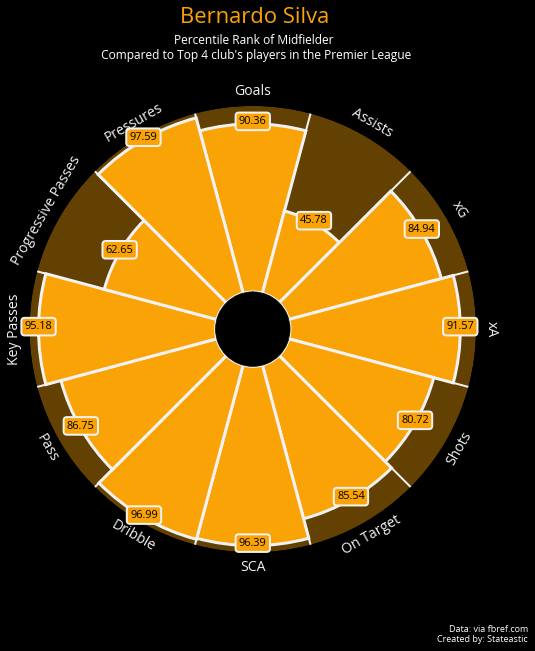

In [130]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza,  add_image, FontManager
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#000000",     # background color
    straight_line_color="#f2f2f2",  # color for straight lines
    straight_line_lw=2,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
                )

font_use= FontManager(("https://github.com/google/fonts/blob/main/apache/opensans/OpenSans%5Bwdth%2Cwght%5D.ttf?raw=true"))


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=3
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#f2f2f2", fontsize=14, zorder=5, 
        fontproperties=font_use.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_use.prop, zorder=3,
        bbox=dict(
            edgecolor="#F2f2f2", facecolor="cornflowerblue",
            boxstyle="round,pad=0.3", lw=2
        )
    )                                # values to be used when adding parameter-values
)

if player_position == "Forward":
    fig.text(
    0.515, 0.965, player_name, size=22,
    ha="center", fontproperties=font_use.prop, color="#168aad")
elif player_position == "Midfielder":
    fig.text(
    0.515, 0.975, player_name, size=22,
    ha="center", fontproperties=font_use.prop, color="#faa307")
elif player_position == "Defender":
    fig.text(
    0.515, 0.975, player_name, size=22,
    ha="center", fontproperties=font_use.prop, color="#ff4d6d")
else:
    print('Error')

# add subtitle
fig.text(
    0.515, .92,
    "Percentile Rank of {}".format(player_position) + "\n Compared to Top 4 club's players in the Premier League",
    size=12,
    ha="center", fontproperties=font_use.prop, color="white"
)

# add credits
CREDIT_1 = "Data: via fbref.com"
CREDIT_2 = "Created by: Stateastic"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_use.prop, color="white",
    ha="right"
)

plt.show()


In [131]:
#save the plot using the player name
if player_position == "Forward":
    fig.savefig(f"{player_name}_percentile_rank_forwards.png")
elif player_position == "Midfielder":
    fig.savefig(f"{player_name}_percentile_rank_midfielders.png")
elif player_position == "Defender":
    fig.savefig(f"{player_name}_percentile_rank_defenders.png")
else:
    print('Error')
    